# Plotting the dataset distribution

This notebook includes code we used to explore the dataset.

In [ ]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import pickle
import json

from google.colab import drive

In [ ]:
# helpers to load and save pickle and json files

def loadPKL(path):
  infile = open(path,'rb')
  X = pickle.load(infile)
  print('Loaded ' + path.split('/')[-1])
  return X

def savePKL(data, path):
  with open(path, 'wb') as f:
    pickle.dump(data, f)
  print('Saved ' + path.split('/')[-1])

def loadJSON(path):
  infile = open(path,'rb')
  X = json.load(infile)
  print('Loaded ' + path.split('/')[-1])
  return X

def saveJSON(data, path):
  with open(path, 'w') as jsonfile:
    json.dump(data, jsonfile)
  print('Saved ' + path.split('/')[-1])

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
data_folder = '/content/drive/MyDrive/dating-images/data/'
fig_folder = '/content/drive/MyDrive/dating-images/figures/'

### load data

In [ ]:
image_data = loadJSON(data_folder + 'all_paths_dates.json') # all available data, pre-clipping to the range 1950-1999
dates = np.array(image_data)[:, 1]
years = []
for i, date in enumerate(dates):
    year = int(date.split('-')[-1])
    years.append(year)

print("Loaded " + str(len(image_data)) + " images")

Loaded all_paths_dates.json
Loaded 43039 images


### find min and max year

In [ ]:
min_year = min(years)
max_year = max(years)
print("Dates range from " + str(min_year) + "-" + str(max_year))

Dates range from 1902-2004


The photograph collection of the De Boer press agency spans the period 1945-2004, so we do not consider any photographs dated earlier than 1945.

In [ ]:
for i, year in reversed(list(enumerate(years))):
    if year < 1945:
        years.pop(i)

### find number of images per year

In [ ]:
date_frequencies = Counter(years)
sorted_keys = sorted(date_frequencies.keys())
sorted_date_frequencies = {key: date_frequencies[key] for key in sorted_keys}
print(sorted_date_frequencies)

{1945: 35, 1946: 36, 1947: 97, 1948: 399, 1949: 232, 1950: 272, 1951: 390, 1952: 358, 1953: 394, 1954: 399, 1955: 344, 1956: 259, 1957: 314, 1958: 200, 1959: 196, 1960: 607, 1961: 396, 1962: 258, 1963: 610, 1964: 655, 1965: 675, 1966: 303, 1967: 700, 1968: 837, 1969: 873, 1970: 877, 1971: 1005, 1972: 728, 1973: 612, 1974: 845, 1975: 986, 1976: 960, 1977: 1075, 1978: 1090, 1979: 1241, 1980: 1982, 1981: 1063, 1982: 1049, 1983: 686, 1984: 1217, 1985: 1282, 1986: 1428, 1987: 950, 1988: 1633, 1989: 1278, 1990: 1101, 1991: 1109, 1992: 991, 1993: 868, 1994: 822, 1995: 819, 1996: 815, 1997: 778, 1998: 800, 1999: 736, 2000: 655, 2001: 658, 2002: 525, 2003: 500, 2004: 27}


In [ ]:
colours = []
for year in sorted_keys:
    if year < 1950 or year > 2000:
        colours.append('lightcoral')
    if year >= 1950 and year < 2000:
        colours.append('royalblue')

### plot images per year

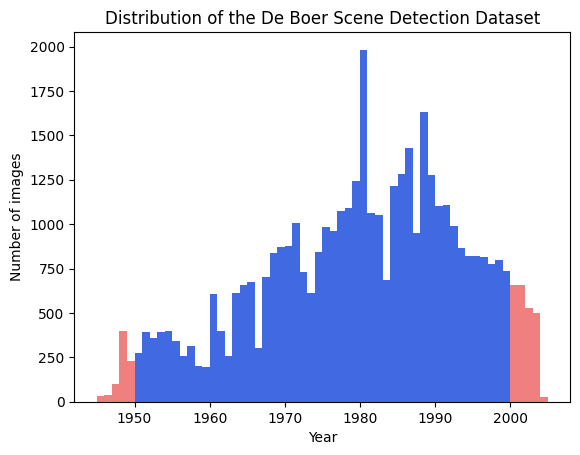

In [ ]:
plt.xticks(np.arange(1900, 2020, 10))
plt.bar(sorted_date_frequencies.keys(),
        sorted_date_frequencies.values(), width=1, color=colours, align='edge')
plt.title("Distribution of the De Boer Scene Detection Dataset")
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.show()
# plt.savefig(fig_folder + 'dataset_distribution_1945-2005.png')

### plot images per decade

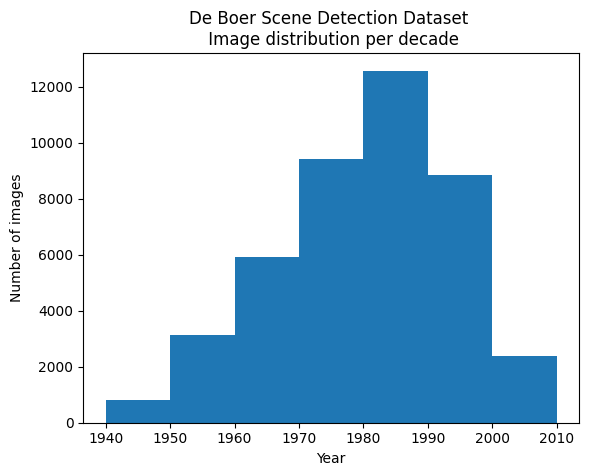

In [ ]:
plt.xticks(np.arange(1940, 2020, 10))
plt.hist(
    years, range=(1940, 2010), bins=7, align="mid")
plt.title("De Boer Scene Detection Dataset \n Image distribution per decade")
plt.xlabel("Year")
plt.ylabel("Number of images")
plt.show()